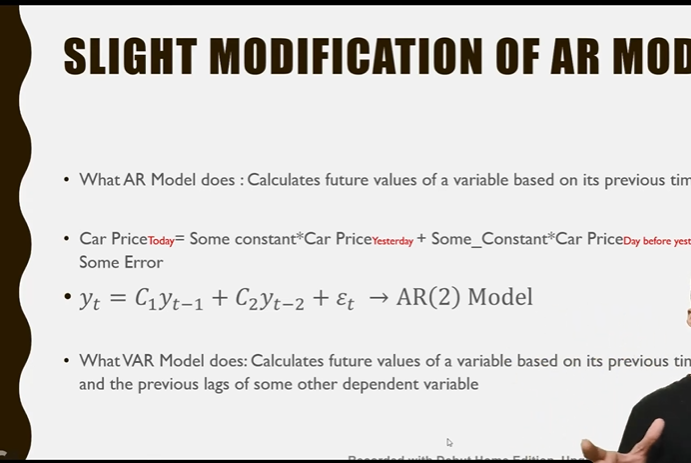

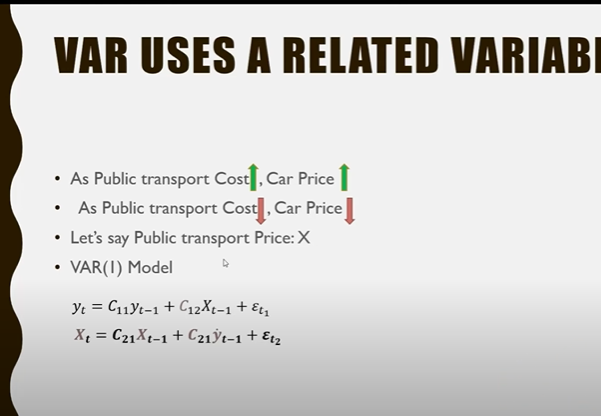

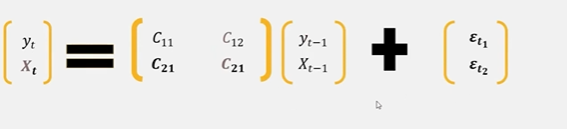

In [1]:

import pandas as pd
df=pd.DataFrame()

In [3]:
df = pd.read_csv('alcohol.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [4]:
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   S4248SM144NCEN  325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


In [6]:
df.describe()

,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [8]:
df.isna().sum()

S4248SM144NCEN    0
dtype: int64

In [9]:
df.shape

(325, 1)

In [13]:
df = df.rename(columns={'S4248SM144NCEN':'Sales'})

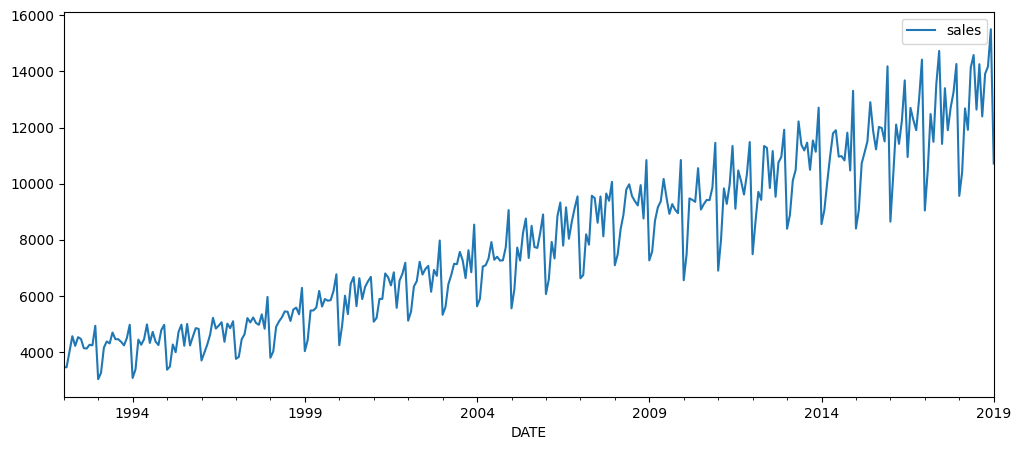

In [15]:
df.plot(figsize=(12,5))
df.columns=['Sales']

In [16]:
df['Sale_LastMonth']=df['Sales'].shift(+1)

In [17]:
df.head()

,Sales,Sale_LastMonth
DATE,,
1992-01-01,3459,NaN
1992-02-01,3458,3459.0
1992-03-01,4002,3458.0
1992-04-01,4564,4002.0
1992-05-01,4221,4564.0


In [18]:
df['Sale_2Monthsback']=df['Sales'].shift(+2)
df['Sale_3Monthsback']=df['Sales'].shift(+3)

In [19]:
df.head()

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0


In [20]:

df=df.dropna()

In [21]:
df

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


<Axes: xlabel='DATE'>

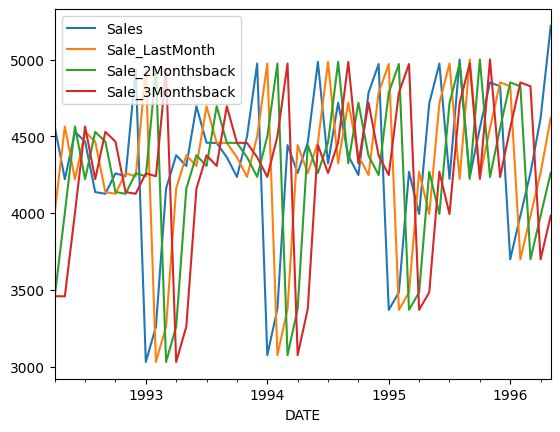

In [27]:
df[:50].plot()

In [22]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [23]:

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [24]:

import numpy as np
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Sales']

In [28]:
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)

In [29]:
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

In [35]:
y[:5]

array([[4564],
       [4221],
       [4529],
       [4466],
       [4137]], dtype=int64)

In [30]:
final_x=np.concatenate((x1,x2,x3),axis=1)

In [36]:
final_x[:5]

array([[4002., 3458., 3459.],
       [4564., 4002., 3458.],
       [4221., 4564., 4002.],
       [4529., 4221., 4564.],
       [4466., 4529., 4221.]])

In [37]:
print(final_x)

[[ 4002.  3458.  3459.]
 [ 4564.  4002.  3458.]
 [ 4221.  4564.  4002.]
 [ 4529.  4221.  4564.]
 [ 4466.  4529.  4221.]
 [ 4137.  4466.  4529.]
 [ 4126.  4137.  4466.]
 [ 4259.  4126.  4137.]
 [ 4240.  4259.  4126.]
 [ 4936.  4240.  4259.]
 [ 3031.  4936.  4240.]
 [ 3261.  3031.  4936.]
 [ 4160.  3261.  3031.]
 [ 4377.  4160.  3261.]
 [ 4307.  4377.  4160.]
 [ 4696.  4307.  4377.]
 [ 4458.  4696.  4307.]
 [ 4457.  4458.  4696.]
 [ 4364.  4457.  4458.]
 [ 4236.  4364.  4457.]
 [ 4500.  4236.  4364.]
 [ 4974.  4500.  4236.]
 [ 3075.  4974.  4500.]
 [ 3377.  3075.  4974.]
 [ 4443.  3377.  3075.]
 [ 4261.  4443.  3377.]
 [ 4460.  4261.  4443.]
 [ 4985.  4460.  4261.]
 [ 4324.  4985.  4460.]
 [ 4719.  4324.  4985.]
 [ 4374.  4719.  4324.]
 [ 4248.  4374.  4719.]
 [ 4784.  4248.  4374.]
 [ 4971.  4784.  4248.]
 [ 3370.  4971.  4784.]
 [ 3484.  3370.  4971.]
 [ 4269.  3484.  3370.]
 [ 3994.  4269.  3484.]
 [ 4715.  3994.  4269.]
 [ 4974.  4715.  3994.]
 [ 4223.  4974.  4715.]
 [ 5000.  4223. 

In [38]:

X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [39]:
model.fit(X_train,y_train)

d:\a27_YEARS_OLD\timeseries\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features=3, random_state=1)

In [41]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [42]:
pred=model.predict(X_test)

In [43]:
pred

array([12319.49, 10738.58, 11679.46, 12570.51, 12081.07, 10311.81,
       10766.92, 11331.1 ,  9523.47, 11816.98, 11541.05, 10331.45,
       12662.42, 11520.24, 11154.75, 12012.44, 10680.35, 11663.51,
       11309.99, 11374.04,  9113.71, 11492.53, 11654.42, 10400.5 ,
       12020.88, 11648.62, 12561.32, 11883.8 , 11760.73, 11648.62])

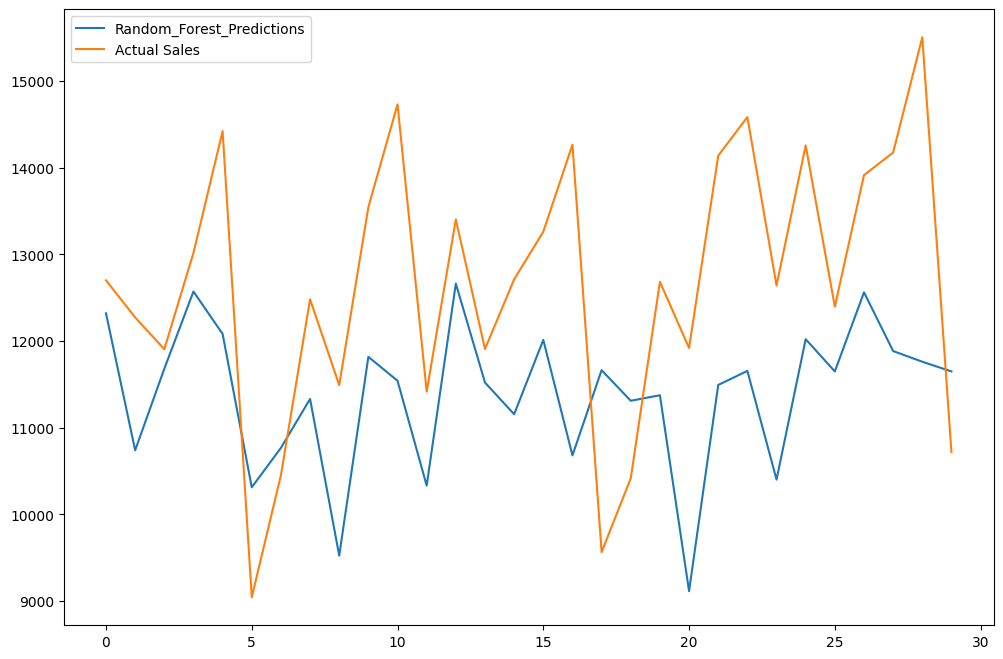

In [44]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [45]:

lin_pred=lin_model.predict(X_test)

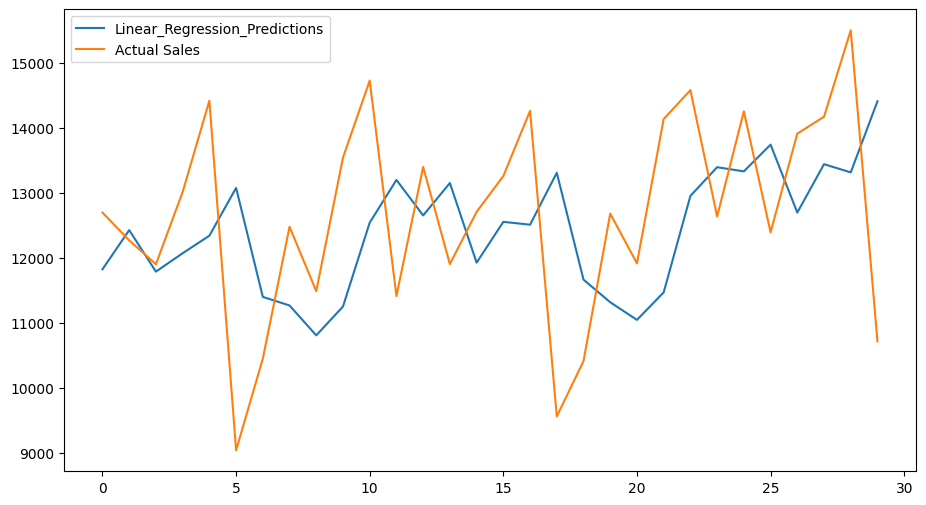

In [46]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [47]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [48]:
rmse_rf

1913.7762399350665

In [49]:
rmse_lr

1791.4965232759828

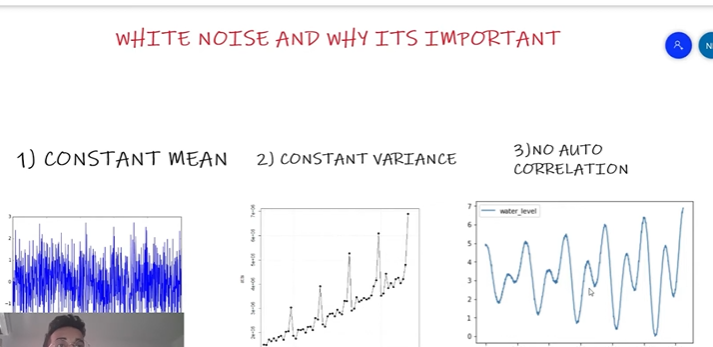

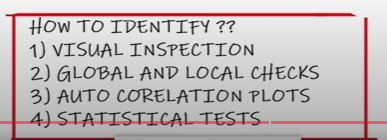